# Preliminary data analysis

## Housekeepin’

In [162]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# lan model
ftm_url = "https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin"
r = requests.get(ftm_url, allow_redirects=True)
open("../data/lid.176.bin", "wb").write(r.content)

# docs
docs_augmented = pd.read_pickle("../../data/docs-augmented.pkl")
docs_augmented.head(3)

,Participant,Sector,Country,Year,Language,Link,FileType,FileName,FileTypeMagic,ConversionStatus,ConvertedFileName,OCRStatus,OutputText,OutputFileName
0,AGNI MOTORS,Electronic & Electrical Equ...,India,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,pdf,0000-2019-agni-motors.pdf,application/pdf,NaN,0000-2019-agni-motors.pdf,0,®AGNI MOTORS ayAN ISO 9001 : 2008 COMPANY Agni...,../../data/text-reports/0000-2019-agni-motors.txt
1,AMBEV S/A,Beverages,Brazil,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,pdf,0001-2019-ambev-s-a.pdf,application/pdf,NaN,0001-2019-ambev-s-a.pdf,0,SUSTAINABILITYREPORT 2018“=( a .)‘Jambev:F =- ...,../../data/text-reports/0001-2019-ambev-s-a.txt
2,Access Spectrum Company Limited,Technology Hardware & Equip...,Myanmar,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,pdf,0002-2019-access-spectrum-company-limited.pdf,application/pdf,NaN,0002-2019-access-spectrum-company-limited.pdf,0,H.E. ANTONIO GUTERRESSecretary GeneralUnited N...,../../data/text-reports/0002-2019-access-spect...


In [163]:
display(docs_augmented.shape[0])
display(docs_augmented.OutputText.isnull().sum())


100

0

In [164]:
docs_augmented.Year.value_counts()

2019    100
Name: Year, dtype: int64

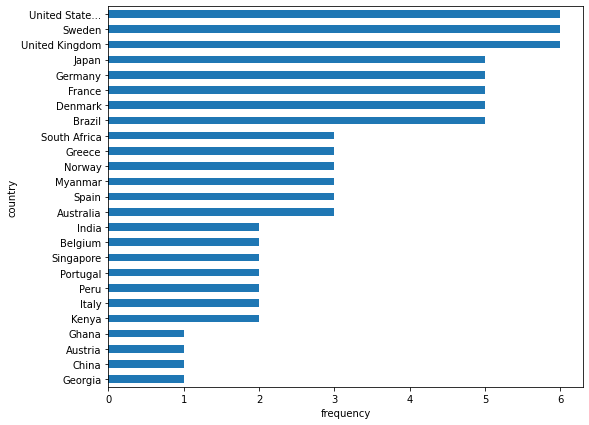

In [165]:
f, ax = plt.subplots(1,1,figsize=(8.5,7))
docs_augmented.groupby("Country").Participant.count().\
    sort_values().tail(25).plot(kind="barh", ax=ax);
ax.set_ylabel("country");
ax.set_xlabel("frequency");

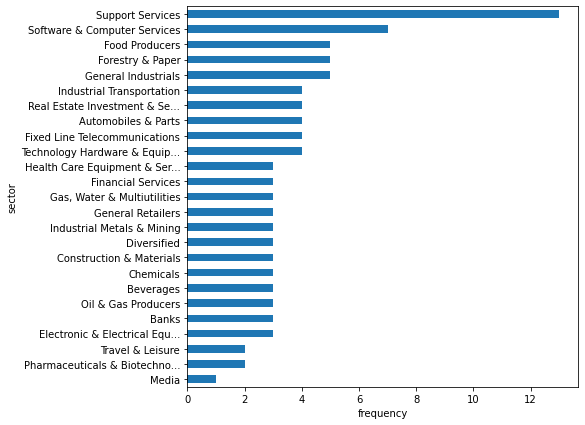

In [166]:
f, ax = plt.subplots(1,1,figsize=(7,7))
docs_augmented.groupby("Sector").Participant.count().\
    sort_values().tail(25).plot(kind="barh", ax=ax);
ax.set_ylabel("sector");
ax.set_xlabel("frequency"); 

In [167]:
# avg documents per participant, possible concat?
docs_augmented.Participant.value_counts().mean()

1.0101010101010102

## Texts

In [168]:
# simple pre-proc
def purge_chars(string):
    import re
    string = string.lower()
    string = re.sub("<.*?>|</.*?>","", string)
    string = re.sub("(s?)(f|ht)tp(s?)://\\S+\\b","",string)
    string = re.sub("[^a-z0-9@ '.,?!\\-:]"," ",string)
    return re.sub("\\s+"," ", string)

docs_augmented["OutputChars"] = docs_augmented.apply(lambda x: purge_chars(x.OutputText), axis=1)    

In [212]:
# chars, no of tokens, no of sentences, languages
def get_characteristics(df):
    import re
    import pandas as pd
    import fasttext as fs
    string = df.OutputChars
    df["n_chars"] = len(string)
    df["n_words"] = len(re.split("\\W+",string))
    df["n_sents"] = len(re.split("[.!?]", string))
    ftm = fs.load_model("../data/lid.176.bin")
    lest = ftm.predict(string, k=1)
    df["lang_est"] = lest[0][0].split("_")[-1]
    return df

docs_augmented = docs_augmented.apply(get_characteristics, axis=1)    

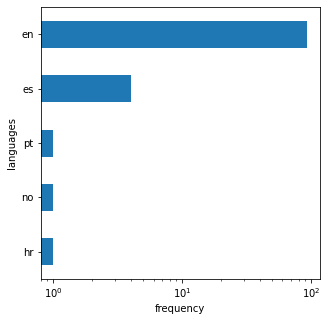

In [211]:
f, ax = plt.subplots(1,1,figsize=(5,5))
docs_augmented.groupby("lang_est").Participant.count().\
    sort_values().tail(25).plot(kind="barh", ax=ax, logx=True);
ax.set_ylabel("languages");
ax.set_xlabel("frequency"); 

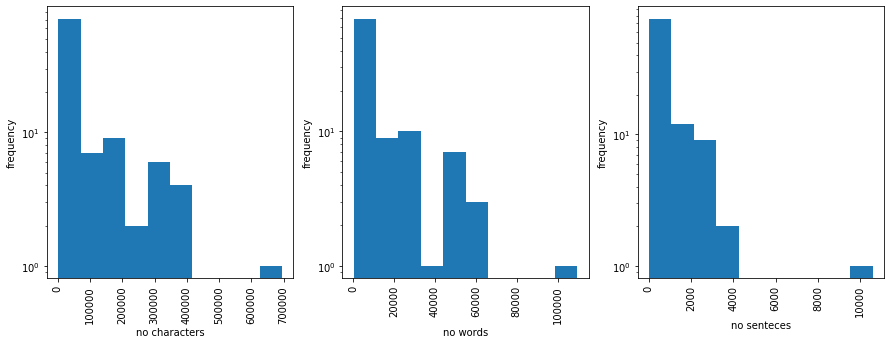

In [210]:
# plot it
f, axs = plt.subplots(1,3,figsize=(15,5))
counts = {"n_chars":"no characters", "n_words":"no words", "n_sents":"no senteces"}
for c, ax in zip(counts.keys(), axs.flatten()):
    docs_augmented[c].plot(kind="hist", ax=ax, logy=True, rot=90);
    ax.set_ylabel("frequency");
    ax.set_xlabel(counts[c]);

In [214]:
#  the most frequent tokens
bow = " ".join(docs_augmented.OutputChars)

In [ ]:
# 1,2,3-grams

In [ ]:
# upos

In [ ]:
# keywords

In [ ]:
# cooc